In [7]:
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [2]:
dataset =  tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = dataset.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

<Axes: ylabel='count'>

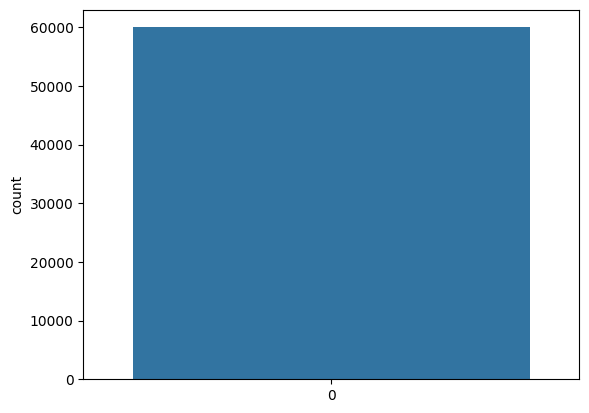

In [11]:
sns.countplot(Y_train)

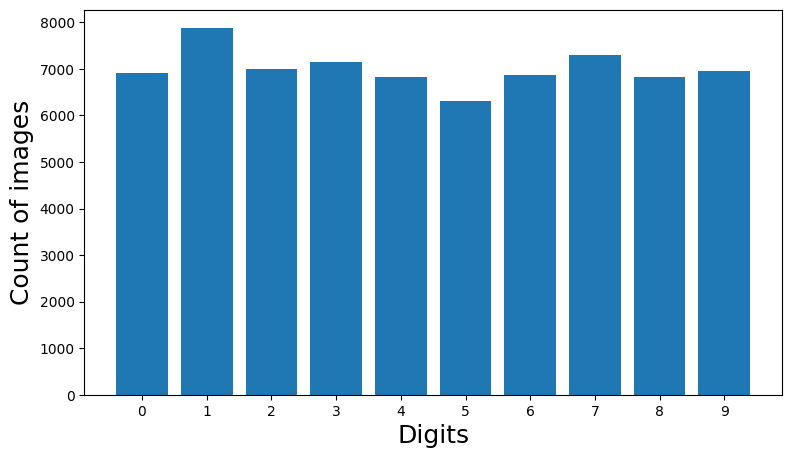

In [5]:
li = [0,0,0,0,0,0,0,0,0,0]
for i in range(len(Y_train)):
  li[Y_train[i]] = li[Y_train[i]] + 1

for i in range(len(Y_test)):
  li[Y_test[i]] = li[Y_test[i]] + 1

fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.bar(np.arange(10), li)
ax.set_xticks(np.arange(10))
plt.xlabel('Digits',fontsize=18)
plt.ylabel('Count of images',fontsize=18)
plt.show()

In [ ]:
#Normalization
X_train  = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#changed dataset to 10000,10 from 10000, so we can apply categorical_crossentropy to it
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_train.shape
Y_test.shape

(10000, 10)

In [ ]:
X_train = np.reshape(X_train, (60000, 28, 28, 1))
X_test = np.reshape(X_test, (10000, 28, 28, 1))

In [ ]:
model = Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 flatten (Flatten)           (None, 43264)             0         
                                                                 
 dense (Dense)               (None, 10)                432650    
                                                                 
Total params: 433,290
Trainable params: 433,290
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_datagen = image.ImageDataGenerator(
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)
Batch_size = 64

In [ ]:
train_generator = train_datagen.flow(
    X_train,
    Y_train,
    batch_size = Batch_size
    )

In [ ]:
test_generator = train_datagen.flow(
    X_test,
    Y_test,
    batch_size = Batch_size
    )

In [ ]:
hist = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs = 100,
    validation_data = test_generator,
    validation_steps = len(test_generator)
)

Epoch 1/100
938/938 [==============================] - 15s 14ms/step - loss: 0.4017 - accuracy: 0.8737 - val_loss: 0.2410 - val_accuracy: 0.9207
Epoch 2/100
938/938 [==============================] - 13s 13ms/step - loss: 0.2369 - accuracy: 0.9230 - val_loss: 0.2024 - val_accuracy: 0.9336
Epoch 3/100
938/938 [==============================] - 12s 13ms/step - loss: 0.2033 - accuracy: 0.9340 - val_loss: 0.1853 - val_accuracy: 0.9426
Epoch 4/100
938/938 [==============================] - 13s 13ms/step - loss: 0.1850 - accuracy: 0.9403 - val_loss: 0.1817 - val_accuracy: 0.9428
Epoch 5/100
938/938 [==============================] - 13s 13ms/step - loss: 0.1712 - accuracy: 0.9445 - val_loss: 0.1598 - val_accuracy: 0.9484
Epoch 6/100
938/938 [==============================] - 12s 13ms/step - loss: 0.1604 - accuracy: 0.9479 - val_loss: 0.1592 - val_accuracy: 0.9483
Epoch 7/100
938/938 [==============================] - 13s 13ms/step - loss: 0.1537 - accuracy: 0.9506 - val_loss: 0.1542 - val_ac

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Mnist_digit/mnist_digit_weight.h5')

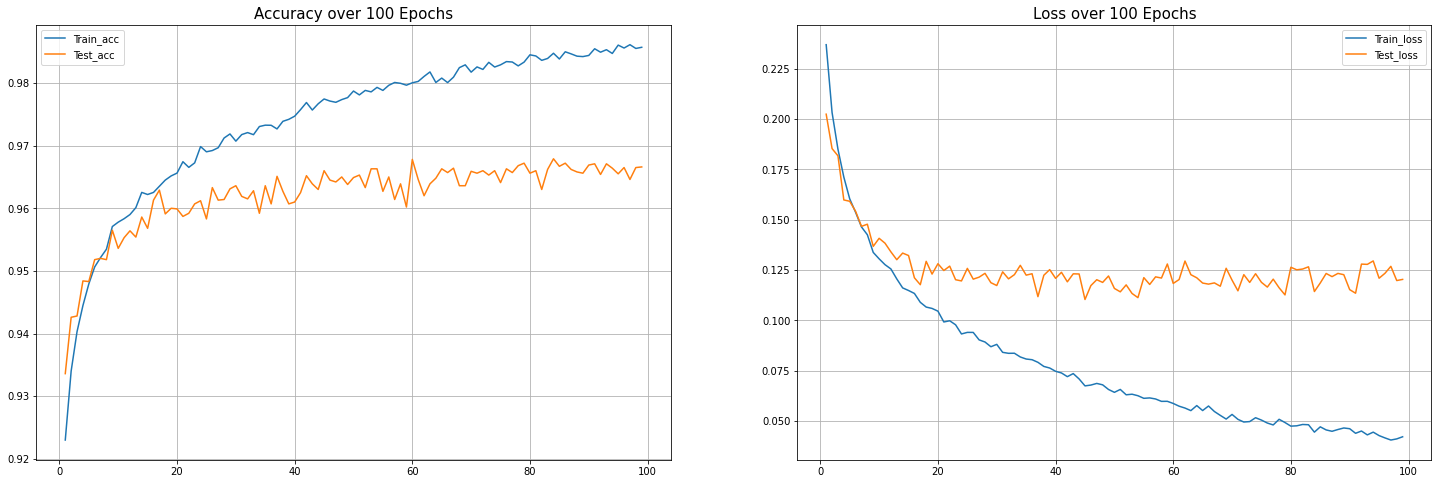

In [ ]:
def plot_acc_loss(result, epochs):
    accuracy = result.history['accuracy']
    loss = hist.history['loss']
    val_accuracy = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    plt.figure(figsize=(25, 8))
    plt.subplot(121)
    plt.plot(range(1,epochs), accuracy[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_accuracy[1:], label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(hist, 100)

In [ ]:
new_model = load_model('/content/drive/MyDrive/Colab Notebooks/Mnist_digit/mnist_digit_weight.h5')

Identified digit:  7


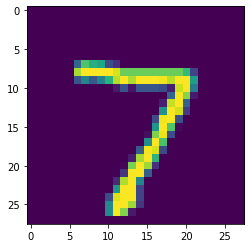




Identified digit:  2


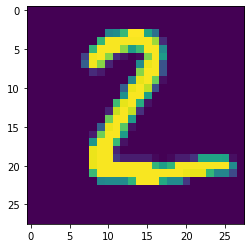




Identified digit:  1


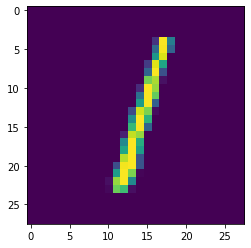




Identified digit:  0


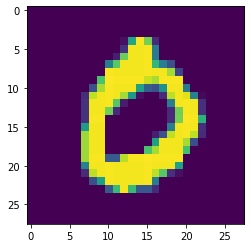




Identified digit:  4


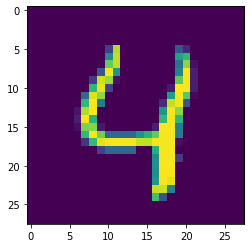

In [ ]:
X_test = np.reshape(X_test, (10000, 28, 28,1))
prediction=new_model.predict(X_test)
X_test = np.reshape(X_test, (10000, 28, 28))

for i in range(5):
  print("Identified digit: ",np.argmax(prediction[i]))
  plt.imshow(X_test[i])
  plt.show()
  print("\n\n")

Identified digit:  0


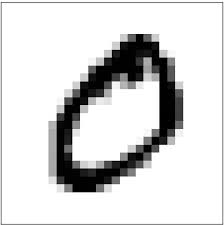

In [ ]:
#Testing it on a random digit image from the internet
from PIL import Image, ImageOps
import numpy

img= Image.open("/content/drive/MyDrive/Colab Notebooks/Mnist_digit/download.jpg")
gray_image = ImageOps.grayscale(img)
np_img = numpy.array(gray_image)
np_img = np.resize(np_img, (1,28, 28,1))

new_model = load_model('/content/drive/MyDrive/Colab Notebooks/Mnist_digit/mnist_digit_weight.h5')
prediction=new_model.predict(np_img)
print("Identified digit: ",np.argmax(prediction))

display(img)